In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('acb.csv')

In [45]:
# Xử lý dữ liệu
prices = data['Price']

In [46]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [47]:
scaled_prices

array([[0.13206988],
       [0.13068542],
       [0.13206988],
       ...,
       [0.62679829],
       [0.63605888],
       [0.64763461]])

In [48]:
#RATIO 82

In [49]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [50]:
test_data

array([[0.4601077 ],
       [0.51798638],
       [0.55965903],
       [0.56428932],
       [0.58512564],
       [0.57123476],
       [0.5828105 ],
       [0.5388227 ],
       [0.49715005],
       [0.5388227 ],
       [0.55039844],
       [0.61522256],
       [0.62679829],
       [0.63142858],
       [0.63374373],
       [0.60364682],
       [0.5828105 ],
       [0.52724697],
       [0.55039844],
       [0.58049535],
       [0.55502873],
       [0.52030152],
       [0.55734388],
       [0.53419241],
       [0.47862888],
       [0.5388227 ],
       [0.56891961],
       [0.57354991],
       [0.54808329],
       [0.53650755],
       [0.55039844],
       [0.56660447],
       [0.58975594],
       [0.62448314],
       [0.61985285],
       [0.6175377 ],
       [0.63605888],
       [0.68236182],
       [0.68699211],
       [0.62679829],
       [0.62679829],
       [0.64300432],
       [0.6615255 ],
       [0.63605888],
       [0.6615255 ],
       [0.66615579],
       [0.66847094],
       [0.659

In [51]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [52]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [53]:
X_train.shape

(1158, 30, 1)

In [54]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [55]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [56]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
19/19 [==============================] - 1s 889us/step - loss: 0.0467
Epoch 2/100
19/19 [==============================] - 0s 833us/step - loss: 0.0041
Epoch 3/100
19/19 [==============================] - 0s 889us/step - loss: 0.0015
Epoch 4/100
19/19 [==============================] - 0s 889us/step - loss: 0.0012
Epoch 5/100
19/19 [==============================] - 0s 834us/step - loss: 0.0011
Epoch 6/100
19/19 [==============================] - 0s 834us/step - loss: 9.1513e-04
Epoch 7/100
19/19 [==============================] - 0s 889us/step - loss: 8.8071e-04
Epoch 8/100
19/19 [==============================] - 0s 945us/step - loss: 7.9655e-04
Epoch 9/100
19/19 [==============================] - 0s 834us/step - loss: 7.4496e-04
Epoch 10/100
19/19 [==============================] - 0s 834us/step - loss: 7.0101e-04
Epoch 11/100
19/19 [==============================] - 0s 834us/step - loss: 7.4850e-04
Epoch 12/100
19/19 [==============================] - 0s 945us/step - lo

In [57]:
data.index


RangeIndex(start=0, stop=1485, step=1)

In [58]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

9/9 [==============================] - 0s 750us/step
[[1486]
 [1487]
 [1488]
 [1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]]
1/1 [==============================] - 0s 13ms/step
[21821.309 21891.734 21939.697 22132.535 22258.459 22232.191 22151.242
 22489.5   22699.307 22815.047 22401.148 22407.693 22266.803 22488.05
 21839.562 21876.125 21661.893 21671.834 21736.863 21591.549 21665.344
 21840.732 21973.148 22037.867 22058.049 22031.445 22034.365 22141.371
 22073.215 22247.346]


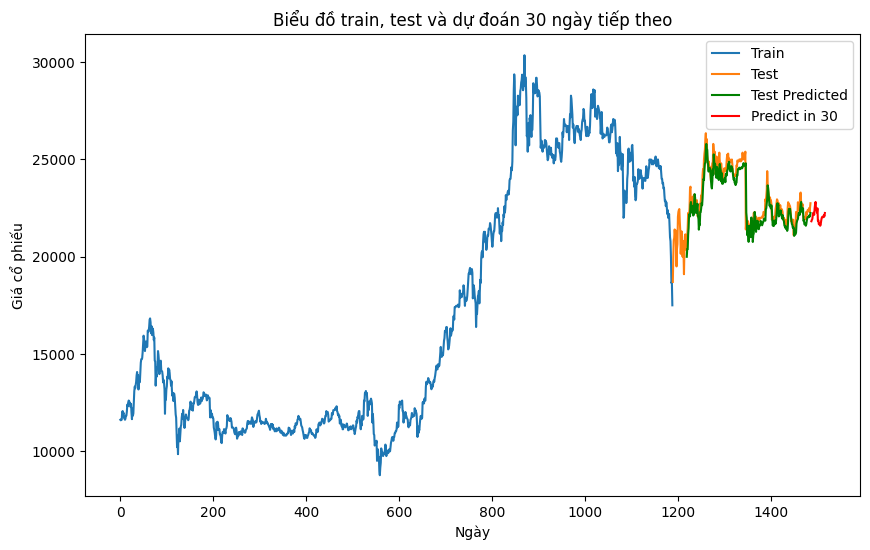

In [59]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




9/9 [==============================] - 0s 750us/step


In [61]:
y_test1

array([[20650.],
       [21000.],
       [21500.],
       [22250.],
       [22150.],
       [22100.],
       [22500.],
       [23500.],
       [23600.],
       [22300.],
       [22300.],
       [22650.],
       [23050.],
       [22500.],
       [23050.],
       [23150.],
       [23200.],
       [23000.],
       [22750.],
       [22550.],
       [22800.],
       [22900.],
       [22900.],
       [22100.],
       [22100.],
       [22000.],
       [22000.],
       [21900.],
       [22700.],
       [22650.],
       [22850.],
       [23150.],
       [23100.],
       [23450.],
       [24200.],
       [24500.],
       [24150.],
       [25000.],
       [25300.],
       [25500.],
       [26000.],
       [26350.],
       [25400.],
       [26050.],
       [25200.],
       [25000.],
       [24500.],
       [24900.],
       [24600.],
       [24650.],
       [24500.],
       [24200.],
       [23900.],
       [23850.],
       [24550.],
       [24800.],
       [24800.],
       [25800.],
       [25500.

In [62]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.87
MAE: 434.262
RMSE: 555.604
MSLE: 0.024
-------------------
